In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('user.csv', index_col = 'user_id')
df

,username,user_url,confirm_owner,detail_name,country,user_followers
user_id,,,,,,
0,Dynasty Haiti,https://www.soundcloud.com/dynastyhaiti,Yes,Dynasty Haiti,FL / United States,17500.0
1,"Documentary On One, RTÉ",https://www.soundcloud.com/doc-on-one,Not yet,RTÉ Radio 1,Dublin / Ireland,776968.0
2,Dream Crusher Media,https://www.soundcloud.com/dream-crusher-media,Yes,Dream Crusher,Calgary,166460.0
3,Doug Loves Minis,https://www.soundcloud.com/dougloves,Not yet,Doug Benson,Los Angeles / United States,588008.0
4,Dandalin VOA,https://www.soundcloud.com/voahausa,Not yet,NaN,"Washington, DC / United States",1173.0
...,...,...,...,...,...,...
5590,Phill Fischer,https://www.soundcloud.com/phill-fischer,NaN,NaN,NaN,NaN
5591,ShAW N Henderson,https://www.soundcloud.com/shaw-n-henderson,NaN,NaN,NaN,NaN
5592,Christine Emad,https://www.soundcloud.com/christine-emad-5917...,NaN,NaN,NaN,NaN


In [3]:
row, col = df.shape[0], df.shape[1]
print("Shape of database: " ,row, col)

Shape of database:  5595 6


- Meaning of each column:
    - username: Name of user who using soundcloud
    - user_url: Link of user homepage on soundcloud
    - confirm_owner: Confirm the individual is the owner
    - detail_name: Name of user will display on homepage
    - country: where user come from
    - user_followers: number of followers who follow this user 

#### Check duplicated

In [4]:
num_duplicated_rows = df.index.duplicated().sum()
print(num_duplicated_rows)

0


#### Type of data

In [5]:
dtypes = df.dtypes
dtypes

username           object
user_url           object
confirm_owner      object
detail_name        object
country            object
user_followers    float64
dtype: object

#### Percent of NaN in each column

In [6]:
name_col = ['username', 'user_url','confirm_owner', 'detail_name','country','user_followers']
percent_NaN = []
for name in name_col:
    missing = (df[name].isna().sum()/row*100).round(2)
    percent_NaN.append(missing)
full = [name_col,percent_NaN]
data_full = pd.DataFrame(full).transpose()
data_full.columns = ['Name col', 'Percent NaN (%)']
data_full.transpose()

,0,1,2,3,4,5
Name col,username,user_url,confirm_owner,detail_name,country,user_followers
Percent NaN (%),0.0,0.0,39.37,67.33,58.78,39.37


#### Confirm ower

- Confirm ower col has 3 value: Yes, Not yet and NaN. We remove NaN and find percent of Yes and Not Yet

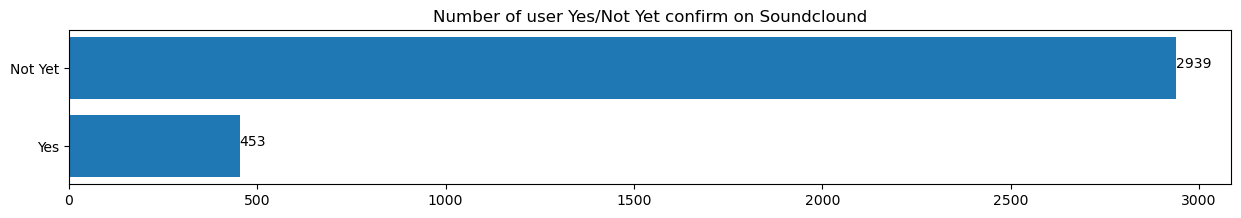

In [7]:
confirm_ower_col = df['confirm_owner']
data = confirm_ower_col.dropna().value_counts(ascending=True)
num = np.array([data[i] for i in range(len(data))])
status = np.array(['Yes', 'Not Yet'])

x_bar = status
y_bar = num.astype(int)
plt.figure(figsize=(15,2)) 
plt.barh(x_bar, y_bar)
plt.title("Number of user Yes/Not Yet confirm on Soundclound")
for index, value in enumerate(y_bar):
    plt.text(value, index,
             str(value))

#### Top 10 user have most follower on soundcloud

In [8]:
user_follower_col = df[['username', 'user_followers']].dropna().sort_values(by='user_followers',ascending=False).reset_index(drop=True)
user_follower_col['user_followers'] = user_follower_col['user_followers'].astype('int')
user_follower_col['username'] = user_follower_col['username'].astype('str')

user_follower_col.head()

,username,user_followers
0,XXXTENTACION,5117983
1,Los Campesinos!,4740932
2,bluenoterecords,4379117
3,Okeh Records,4228760
4,IAMBENGA,3378320


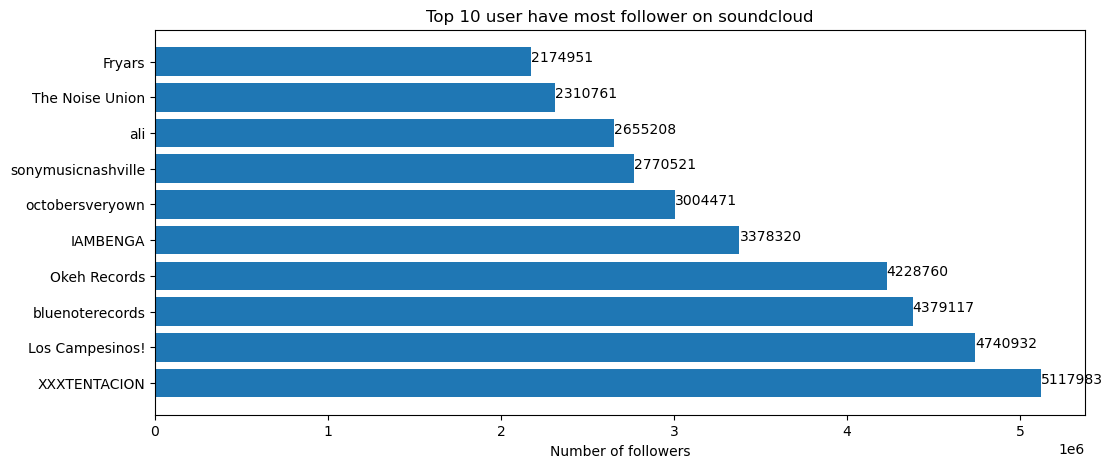

In [9]:
username = []
userfollower = []
for i in range(10):
    username.append(user_follower_col['username'][i])
    userfollower.append(user_follower_col['user_followers'][i])

x_bar = username
y_bar = userfollower
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of followers")
plt.title("Top 10 user have most follower on soundcloud")
for index, value in enumerate(y_bar):
    plt.text(value, index,
             str(value))

#### Top 10 country have the most user on soundcloud

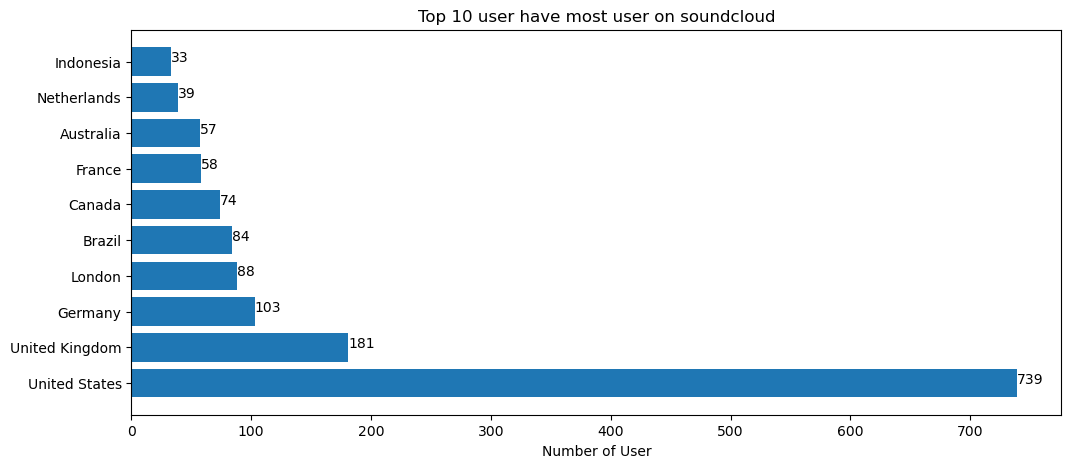

In [10]:
country = np.array(df['country'].dropna()).astype('str')

def updateCountry(s):
    ls = s.split(' / ')
    if(len(ls) == 2):
        return ls[1]
    else:
        return ls[0]

for i in range(len(country)):
    country[i] = updateCountry(country[i])

data, count = np.unique(country, return_counts=True)
count_sort_ind = np.argsort(-count)

data = data[count_sort_ind]
count = count[count_sort_ind]

x_bar = data[0:10]
y_bar = count[0:10]
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of User")
plt.title("Top 10 user have most user on soundcloud")
for index, value in enumerate(y_bar):
    plt.text(value, index,
             str(value))

#### Top 10 country have most follower on soundcloud

In [11]:
country_follower = df[['country', 'user_followers']].dropna().reset_index(drop=True)
country_follower['user_followers'].astype('int')
for i in range(len(country_follower)):
    country_follower['country'][i] = updateCountry(country_follower['country'][i])

/tmp/ipykernel_4920/2023008223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_follower['country'][i] = updateCountry(country_follower['country'][i])


In [12]:
data_country = data
data_count = np.zeros(len(data_country))
dic ={}
for A, B in zip(data_country, data_count):
    dic[A] = B

for i in range(len(country_follower)):
    if (country_follower['country'][i] in data_country):
        dic[country_follower['country'][i]] += country_follower['user_followers'][i]
sorted(dic.items(), key=lambda item: item[1],reverse=True)

[('United States', 58207668.0),
 ('United Kingdom', 22118762.0),
 ('London', 18802333.0),
 ('Australia', 6381251.0),
 ('Canada', 4994140.0),
 ('Germany', 4524707.0),
 ('France', 3899056.0),
 ('Brazil', 2481604.0),
 ('World Wide', 2310761.0),
 ('Sweden', 2162684.0),
 ('Ireland', 1588845.0),
 ('Get Your Music Heard!', 1509004.0),
 ('Atlanta/Decatur', 1421388.0),
 ('Nashville, TN', 1216872.0),
 ('Chile', 1184472.0),
 ('Republic of Korea', 846636.0),
 ('Netherlands', 842746.0),
 ('0', 722795.0),
 ('Indonesia', 692168.0),
 ('Israel', 661139.0),
 ('India', 643424.0),
 ('Jamaica', 629417.0),
 ('Egypt', 610619.0),
 ('Greece', 604722.0),
 ('Worldwide', 527552.0),
 ('Ulster', 503056.0),
 ('Japan', 495054.0),
 ('Leeds', 492926.0),
 ('Argentina', 485237.0),
 ('Mexico', 463086.0),
 ('New York and London', 421591.0),
 ('Norway', 417882.0),
 ('ZONE 6', 407394.0),
 ('Viet Nam', 381309.0),
 ('Croatia', 371959.0),
 ('BBC Radio', 358494.0),
 ('PALESTINE', 358160.0),
 ('Edinburgh', 324692.0),
 ('seoul', 3

In [13]:
result = dic.items()
data = list(result)
numpyArray = np.array(data)



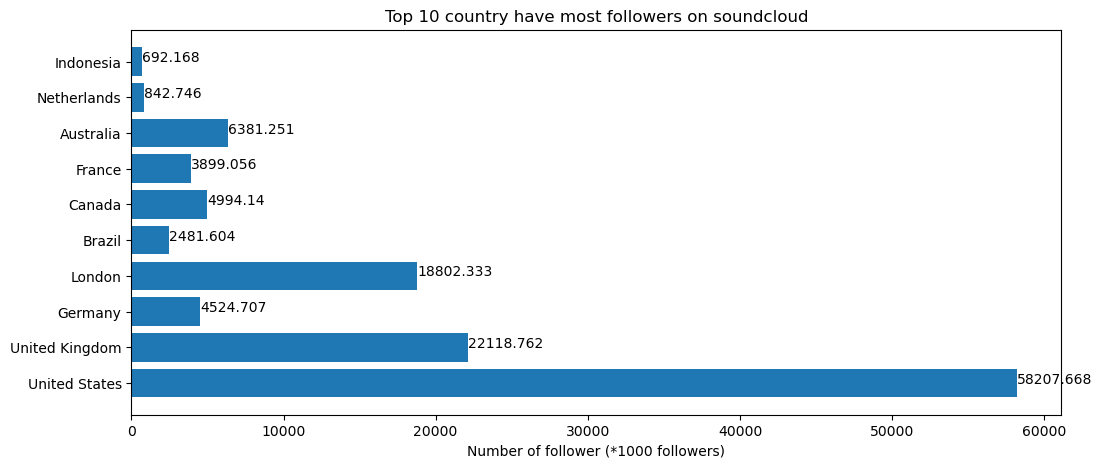

In [14]:
top10_country = []
count = []

for i in range(10):
    top10_country.append(numpyArray[i][0])
    count.append(numpyArray[i][1].astype('float')/1000)


x_bar = top10_country
y_bar = count
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of follower (*1000 followers)")
plt.title("Top 10 country have most followers on soundcloud")
for index, value in enumerate(y_bar):
    plt.text(value, index,
             str(value))

#### Where user have confirm come from?

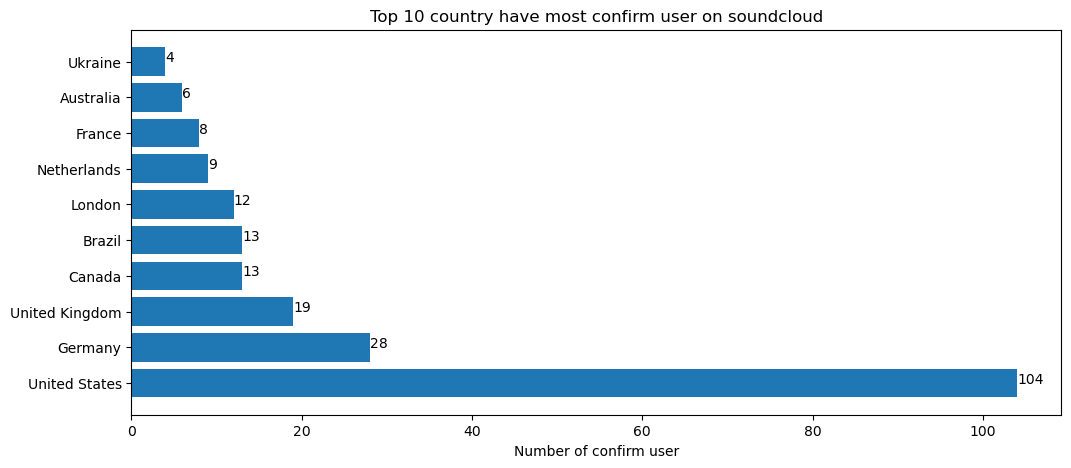

In [15]:
data = df[['confirm_owner','country']].dropna().reset_index(drop = True)
for i in range(len(data)):
    data['country'][i]= updateCountry(data['country'][i])
data_new= data[data['confirm_owner'] == 'Yes'].reset_index(drop = True)
dt = np.array(data_new['country'])

data, count = np.unique(dt, return_counts=True)
count_sort_ind = np.argsort(-count)

data = data[count_sort_ind]
count = count[count_sort_ind]

x_bar = data[0:10]
y_bar = count[0:10]
plt.figure(figsize=(12,5)) 
plt.barh(x_bar, y_bar)
plt.xlabel("Number of confirm user")
plt.title("Top 10 country have most confirm user on soundcloud")
for index, value in enumerate(y_bar):
    plt.text(value, index,
             str(value))